## **Proyecto final**
### **Laboratorio de Programación Científica para Ciencia de Datos MDS7202**

Integrante 1: Benjamín Angulo

Integrante 2: Vanessa González

### **1. Introducción**

Esta sección es una muy breve introducción con todo lo necesario para entender que hicieron en su proyecto.

Describir brevemente el problema planteado (¿Qué se intenta predecir?)

Describir brevemente los datos de entrada que les provee el problema.

Describir las métricas que utilizarán para evaluar los modelos generados. Elijan una métrica adecuada para el desarrollo del
proyecto según la tarea que deben resolver y la institución a la cuál será su contraparte y luego justifiquen su elección.

Considerando que los datos presentan desbalanceo y que el uso de la métrica 'accuracy' sería incorrecto, enfoquen su
elección en una de las métricas precision, recall o f1-score y en la clase que será evaluada.

[Escribir al final] Describir brevemente los modelos que usaron para resolver el problema (incluyendo las transformaciones
intermedias de datos).

[Escribir al final] Indicar si lograron resolver el problema a través de su modelo final. Indiquen además si creen que los
resultados de su mejor modelo son aceptables y como les fue con respecto al resto de los equipos.

Variables disponibles:

1. income: La lana que el equipo obtiene.
2. AliasMatch: Cuánto coinciden el nombre y el correo.
3. OldHoodMonths: Meses pasando el rato en la vieja casa.
4. NewCribMonths: Meses instalados en el nuevo lugar.
5. customer_age: Los años que ha estado el cliente en el juego.
6. DaysSinceJob: Días desde que se planeó el último gran golpe.
7. intended_balcon_amount: La lana destinada para el trabajo.
8. LootMethod: Cómo se va a mover la plata.
9. ZipHustle: Actividad de estafa en el código postal en las últimas 4 semanas.
10. Speed6h: Qué tan rápido se movieron en las últimas 6 horas.
11. Speed24h: Qué tan rápido se movieron en las últimas 24 horas.
12. Speed4w: Qué tan rápido se movieron en las últimas 4 semanas.
13. BankSpots8w: Número de bancos golpeados en las últimas 8 semanas.
14. DOBEmails4w: Correos diferentes usados con la misma fecha de nacimiento en las últimas 4 semanas.
15. JobStatus: ¿Cuál es la situación laboral del cliente?
16. RiskScore: Qué tan riesgoso cree el equipo que es el trabajo.
17. FreeMail: Si el correo proviene de un proveedor gratuito o no.
18. CribStatus: El tipo de vivienda donde está instalado el cliente.
19. HomePhoneCheck: Si el teléfono fijo está en orden.
20. CellPhoneCheck: Si el teléfono celular es legítimo.
21. BankMonths: Cuánto tiempo ha estado el cliente con su banco actual.
22. ExtraPlastic: Si el cliente tiene otras tarjetas de crédito.
23. CreditCap: El límite propuesto en el crédito.
24. ForeignHustle: Si el trabajo tiene un toque extranjero.
25. InfoSource: De dónde viene la información.
26. HustleMinutes: Cuánto tiempo ha estado el cliente en línea.
27. DeviceOS: El sistema operativo en el dispositivo.
28. AliveSession: Si la sesión sigue activa.
29. DeviceEmails8w: Número de correos únicos usados en el dispositivo en las últimas 8 semanas.
30. DeviceScams: Número de intentos de fraude desde el dispositivo.
31. HustleMonth: El mes en que se lleva a cabo el trabajo.

### **2. Modelos con Scikit-Learn**

In [57]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

#### **2.1 Análisis Exploratorio de Datos**

Esta sección consiste en realizar un análisis exploratorio de datos para investigar patrones, tendencias y relaciones en un conjunto
de datos.


In [58]:
# lectura de archivos
X_t0 = pd.read_csv('X_t0', sep = ',')
y_t0 = pd.read_csv('y_t0', sep = ',')
y_t0 = y_t0[['is_mob']]
df = X_t0.copy()
df['is_mob'] = y_t0['is_mob']

In [59]:
df

,DaysSinceJob,CreditCap,JobStatus,Speed24h,AliveSession,BankSpots8w,HustleMinutes,RiskScore,AliasMatch,DeviceEmails8w,...,ForeignHustle,DeviceScams,OldHoodMonths,intended_balcon_amount,NewCribMonths,Speed6h,CellPhoneCheck,customer_age,ExtraPlastic,is_mob
0,0.006735,1500.0,CB,7850.955007,1,5,16.224843,163,0.986506,1,...,0,0,-1,102.453711,25,13096.035018,1,40,0,0
1,0.010095,1500.0,CA,5745.251481,1,3,3.363854,154,0.617426,1,...,0,0,-1,-0.849551,89,9223.283431,1,20,0,0
2,0.012316,200.0,CA,5471.988958,0,15,22.730559,89,0.996707,1,...,0,0,9,-1.490386,14,4471.472149,1,40,0,0
3,0.006991,200.0,CA,6755.344479,1,11,15.215816,90,0.475100,1,...,0,0,11,-1.863101,14,14431.993621,1,30,0,0
4,5.742626,200.0,CA,5124.046930,0,1,3.743048,91,0.842307,1,...,0,0,-1,47.152498,29,7601.511579,1,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397034,0.024010,200.0,CA,6088.406332,1,10,23.337101,44,0.086446,1,...,0,0,-1,-1.691826,27,8551.416716,1,50,0,0
397035,10.387120,1000.0,CA,5600.230367,0,13,13.307556,194,0.988005,1,...,0,0,-1,-0.783048,316,8080.335172,1,30,0,1
397036,0.011777,500.0,CA,7488.503866,1,1,3.089539,189,0.510312,1,...,0,0,55,-1.141519,12,9999.670220,1,30,1,0
397037,0.016757,200.0,CA,7125.279859,1,15,7.049267,138,0.646016,1,...,0,0,26,-1.004671,2,10590.001702,0,30,0,0


In [60]:
# nulos por columna
print(df.isnull().sum())

DaysSinceJob              0
CreditCap                 0
JobStatus                 0
Speed24h                  0
AliveSession              0
BankSpots8w               0
HustleMinutes             0
RiskScore                 0
AliasMatch                0
DeviceEmails8w            0
CribStatus                0
LootMethod                0
InfoSource                0
HustleMonth               0
ZipHustle                 0
Speed4w                   0
DeviceOS                  0
income                    0
FreeMail                  0
HomePhoneCheck            0
BankMonths                0
DOBEmails4w               0
ForeignHustle             0
DeviceScams               0
OldHoodMonths             0
intended_balcon_amount    0
NewCribMonths             0
Speed6h                   0
CellPhoneCheck            0
customer_age              0
ExtraPlastic              0
is_mob                    0
dtype: int64


In [61]:
# tipo de datos
print(df.dtypes) 

DaysSinceJob              float64
CreditCap                 float64
JobStatus                  object
Speed24h                  float64
AliveSession                int64
BankSpots8w                 int64
HustleMinutes             float64
RiskScore                   int64
AliasMatch                float64
DeviceEmails8w              int64
CribStatus                 object
LootMethod                 object
InfoSource                 object
HustleMonth                 int64
ZipHustle                   int64
Speed4w                   float64
DeviceOS                   object
income                    float64
FreeMail                    int64
HomePhoneCheck              int64
BankMonths                  int64
DOBEmails4w                 int64
ForeignHustle               int64
DeviceScams                 int64
OldHoodMonths               int64
intended_balcon_amount    float64
NewCribMonths               int64
Speed6h                   float64
CellPhoneCheck              int64
customer_age  

In [62]:
# estadísticas generales
df.describe()

,DaysSinceJob,CreditCap,Speed24h,AliveSession,BankSpots8w,HustleMinutes,RiskScore,AliasMatch,DeviceEmails8w,HustleMonth,...,ForeignHustle,DeviceScams,OldHoodMonths,intended_balcon_amount,NewCribMonths,Speed6h,CellPhoneCheck,customer_age,ExtraPlastic,is_mob
count,3.970390e+05,397039.000000,397039.000000,397039.000000,397039.000000,397039.000000,397039.000000,397039.000000,397039.000000,397039.000000,...,397039.000000,397039.0,397039.000000,397039.000000,397039.000000,397039.000000,397039.000000,397039.000000,397039.000000,397039.000000
mean,1.194997e+00,521.162631,5570.712126,0.609026,191.789630,8.393079,112.618186,0.514320,1.031297,1.011432,...,0.027604,0.0,16.752354,9.254470,88.541015,6903.925002,0.876473,33.448452,0.184508,0.009813
std,5.334243e+00,515.446406,1351.261338,0.487969,462.968776,8.648661,72.456036,0.286733,0.220586,0.823676,...,0.163837,0.0,44.058472,20.251431,91.805720,3159.147744,0.329041,12.160613,0.387899,0.098572
min,4.036860e-09,190.000000,1517.555809,0.000000,0.000000,-1.000000,-169.000000,0.000019,-1.000000,0.000000,...,0.000000,0.0,-1.000000,-13.202786,-1.000000,-80.690670,0.000000,10.000000,0.000000,0.000000
25%,7.218052e-03,200.000000,4602.212446,0.000000,1.000000,3.622840,60.000000,0.258522,1.000000,0.000000,...,0.000000,0.0,-1.000000,-1.153763,19.000000,4592.756809,1.000000,20.000000,0.000000,0.000000
50%,1.538161e-02,200.000000,5485.225013,1.000000,10.000000,5.535551,104.000000,0.523120,1.000000,1.000000,...,0.000000,0.0,-1.000000,-0.788469,53.000000,6823.830632,1.000000,30.000000,0.000000,0.000000
75%,2.737877e-02,990.000000,6625.724678,1.000000,31.000000,9.808629,158.000000,0.769828,1.000000,2.000000,...,0.000000,0.0,12.000000,12.655739,133.000000,8847.104551,1.000000,40.000000,0.000000,0.000000
max,7.658148e+01,2100.000000,9502.725577,1.000000,2381.000000,83.213536,389.000000,0.999999,2.000000,2.000000,...,1.000000,0.0,372.000000,112.956928,425.000000,16715.565404,1.000000,90.000000,1.000000,1.000000


In [63]:
# columnas numéricas
columnas_numericas = ["DaysSinceJob", "CreditCap", "Speed24h", "AliveSession", "BankSpots8w", "HustleMinutes", "RiskScore", "AliasMatch", "DeviceEmails8w", "HustleMonth", "ZipHustle", "Speed4w", "income", "FreeMail",
                      "HomePhoneCheck", "BankMonths", "DOBEmails4w", "ForeignHustle", "OldHoodMonths", "intended_balcon_amount", "NewCribMonths", "Speed6h", "CellPhoneCheck", "customer_age", "ExtraPlastic"]
# columnas cateóricas
columnas_categoricas = ["JobStatus", "CribStatus", "LootMethod", "InfoSource", "DeviceOS"]

In [64]:
print(df['JobStatus'].unique())
print(df['CribStatus'].unique())
print(df['LootMethod'].unique())
print(df['InfoSource'].unique())
print(df['DeviceOS'].unique())

['CB' 'CA' 'CC' 'CF' 'CD' 'CE' 'CG']
['BC' 'BE' 'BD' 'BA' 'BB' 'BF' 'BG']
['AA' 'AD' 'AB' 'AC' 'AE']
['INTERNET' 'TELEAPP']
['linux' 'other' 'windows' 'x11' 'macintosh']


In [65]:
correlation_matrix = df[columnas_numericas].corr()
fig = make_subplots(rows=1, cols=1)
heatmap = go.Heatmap(z=correlation_matrix.values,
                     x=correlation_matrix.columns,
                     y=correlation_matrix.columns,
                     colorscale='Viridis')

fig.add_trace(heatmap)

fig.update_layout(
    title_text='Matriz de correlación para columnas numéricas',
    height=800, width=800,
    xaxis_title='Variable',
    yaxis_title='Variable'
)

fig.show()

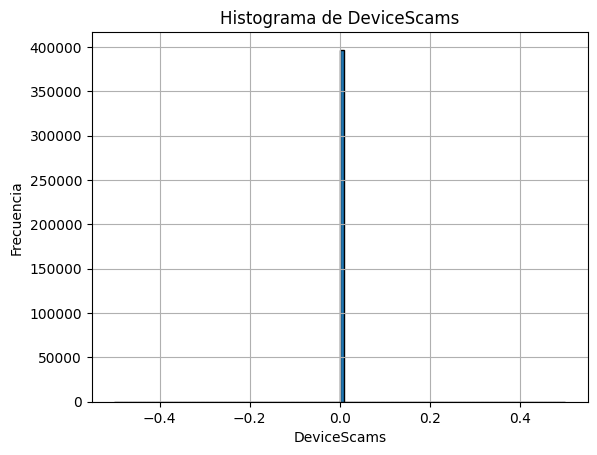

Suma de los valores de Device Scams: 0


In [66]:
# Se realiza un histograma para ver la distribución de los valores
plt.hist(df['DeviceScams'], bins=100, edgecolor='k', alpha=1)
plt.title('Histograma de DeviceScams')
plt.xlabel('DeviceScams')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Se realiza una suma de los valores para comprobar si efectivamente todos son 0
print(f'Suma de los valores de Device Scams: {df["DeviceScams"].sum()}')

In [67]:
# Se elimina la columna DeviceScams ya que todos sus valores son iguales por lo que no aporta información 
df = df.drop('DeviceScams', axis=1)

#### **2.2 Pre-Procesamiento de datos**

Sección consiste en la realización de una limpieza o preprocesamiento de los datos para la creación posterior de los modelos.

Recuerde ejecutar train_test_split para generar un conjunto de entrenamiento y validación.

Se recomienda utilizar distintos tipos de procesamientos, como:
ColumnTransformer,
Imputación de nulos,
Discretización de variables,
Etc.


In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Se crea un columnTransformer para normalizar las variables categóricas y numéricas
col_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas),
        ('cat', OneHotEncoder(), columnas_categoricas)
    ])

In [71]:
from sklearn.model_selection import train_test_split

X = df.drop('is_mob', axis=1)  
y = df['is_mob']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### **2.3 Baseline**

En esta sección se debe detallar la creación del modelo más básico posible que resuelva el problema. La idea es utilizar este
modelo de manera comparativa a los modelos a crear en la sección 5 (modelos de ML).

Implemente, entrene y evalué un modelo enfocado en resolver el problema de clasificación. Para esto, utilice Pipeline. Cada
pipeline debe contener, el preprocesamiento anterior y un clasificador.

Imprimir classification_report .

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

dummy_pipeline = Pipeline([("transform", col_transformer), 
                     ("classifier", DummyClassifier())])

dummy_pipeline.fit(X_train, y_train)

pred = dummy_pipeline.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    117941
           1       0.00      0.00      0.00      1171

    accuracy                           0.99    119112
   macro avg       0.50      0.50      0.50    119112
weighted avg       0.98      0.99      0.99    119112



c:\Users\benja\OneDrive\Escritorio\MDS7202\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\benja\OneDrive\Escritorio\MDS7202\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\benja\OneDrive\Escritorio\MDS7202\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### **2.4 Modelos de ML**

En esta sección, se explicitan los otros 3 modelos realizados. Explicar diferencias e hiperparámetros. Estos modelos también
deben contar con un Pipeline y obtener su classification_report .


#### **2.5 Optimización de modelos**

Acá se explica la forma en la que se realizó la optimización de los modelos. Hiperparámetros ocupados.
Deberán usar Optuna para tunear hiperparámetros. Además de crear pipelines para cada uno de los modelos.

Algunas ideas para mejorar el rendimiento de sus modelos:

Técnicas de selección de atributos.

Variar el imputador de datos, en caso de usarlo.

#### **2.6 Interpretabilidad**

Utilización de SHAP , Anchors u otras herramientas de interpretabilidad, para ver la importancia de cada atributo en el modelo
final. Explicar o justificar la importancia de cada uno.
